In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show_image(img, title):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

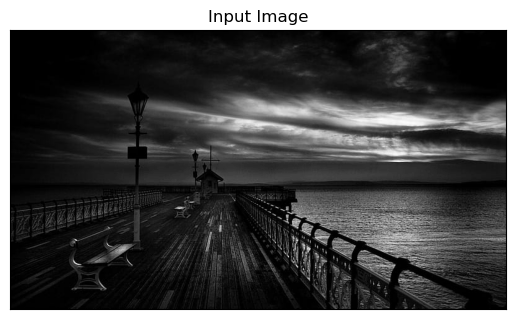

In [3]:
im = cv2.imread('dark_scene.jpg', 0)

show_image(im, 'Input Image')

In [4]:
def plot_histogram(img, label):
    plt.hist(np.array(img).ravel(), bins=256, range=[0, 256])
    plt.title(f'Histogram of {label}')
    plt.show()

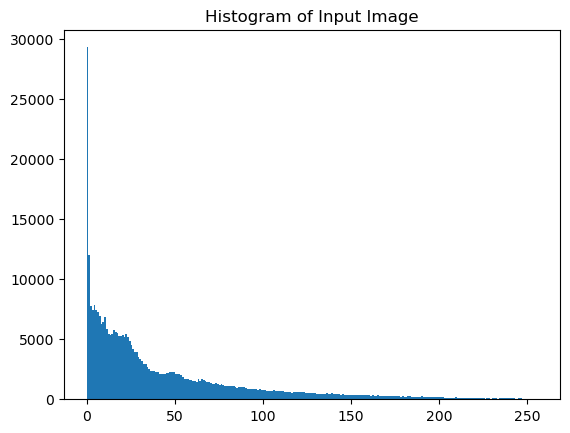

In [5]:
plot_histogram(im, 'Input Image')

In [6]:
def histogram_equalize(img):
    img = np.array(img)
    hist = np.histogram(img.ravel(), bins=256, range=[0,256])[0]
    prob_hist = hist / hist.sum()
    cumulative_prob = np.cumsum(prob_hist) 
    map_fn = np.array(cumulative_prob * 256, dtype=np.uint8)
    
    out_img = np.zeros_like(img)
    r, c = out_img.shape
    for i in range(r):
        for j in range(c):
            out_img[i, j] = map_fn[img[i, j]]
    
    return out_img

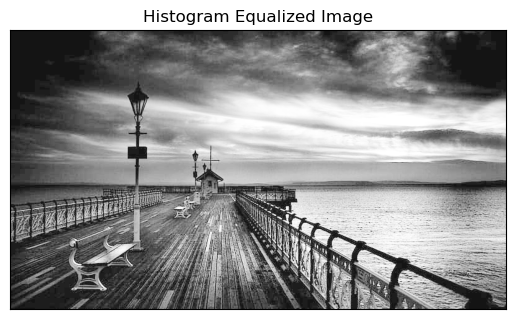

In [7]:
out_im = histogram_equalize(im)

show_image(out_im, 'Histogram Equalized Image')

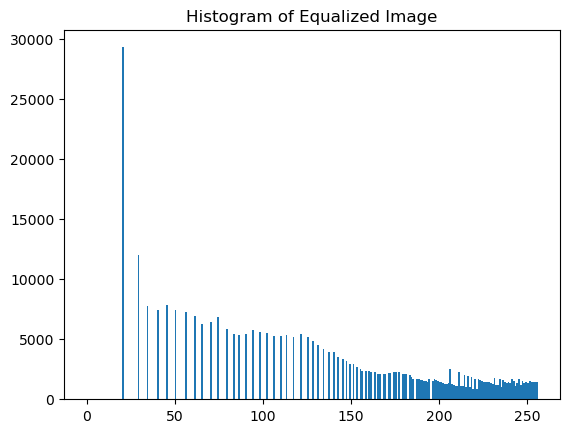

In [8]:
plot_histogram(out_im, 'Equalized Image')